In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

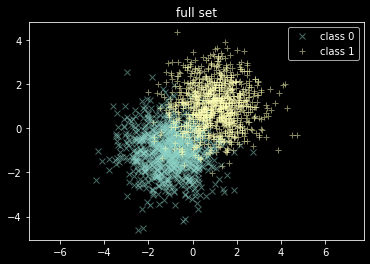

In [2]:
covariance = np.eye(2)
num_samples = 1000

mean = -np.ones(2)
samples0 = multivariate_normal(mean, covariance).rvs(size=num_samples)
labels0 = np.zeros(num_samples)

mean = np.ones(2)
samples1 = multivariate_normal(mean, covariance).rvs(size=num_samples)
labels1 = np.ones(num_samples)

plt.plot(samples0[:, 0], samples0[:, 1], 'x', alpha=0.5, label='class 0')
plt.plot(samples1[:, 0], samples1[:, 1], '+', alpha=0.5, label='class 1')
plt.legend()
plt.title('full set')
plt.axis('equal')
plt.show()

In [3]:
X = torch.from_numpy(np.concatenate((samples0, samples1), axis=0)).float()
y = torch.from_numpy(np.concatenate((labels0, labels1))).float()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train, y_train = torch.Tensor(X_train), torch.Tensor(y_train)
X_test, y_test = torch.Tensor(X_test), torch.Tensor(y_test)

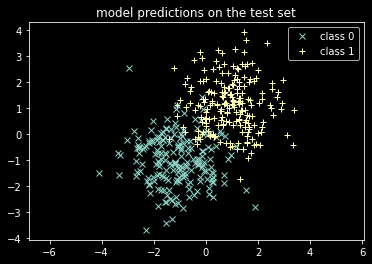

In [4]:
inds0 = np.argwhere(y_test == 0).ravel()
inds1 = np.argwhere(y_test == 1).ravel()

plt.plot(X_test[inds0, 0], X_test[inds0, 1], 'x', label='class 0')
plt.plot(X_test[inds1, 0], X_test[inds1, 1], '+', label='class 1')
plt.legend()
plt.title('model predictions on the test set')
plt.axis('equal')
plt.show()

In [5]:
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

input_size = X.shape[1]
hidden_size = 100
output_size = 1

model = NN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

train_dataset = TensorDataset(X_train, y_train.view(-1, 1))
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

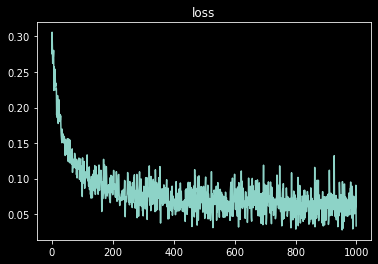

In [6]:
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

plt.title('loss')
plt.plot(losses)
plt.show()

In [7]:
with torch.no_grad():
    model.eval()
    predictions = model(X_test)
    predicted_labels = (predictions > 0.5).float().view(-1)
    accuracy = torch.sum(predicted_labels == y_test) / len(y_test)
    print(f'test accuracy: {accuracy.item()*100:.2f}%')

test accuracy: 93.25%


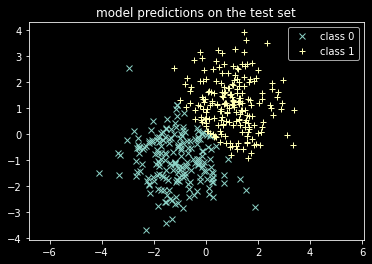

In [8]:
prd = predicted_labels.numpy()
inds0 = np.argwhere(prd == 0).ravel()
inds1 = np.argwhere(prd == 1).ravel()

plt.plot(X_test[inds0, 0], X_test[inds0, 1], 'x', label='class 0')
plt.plot(X_test[inds1, 0], X_test[inds1, 1], '+', label='class 1')
plt.legend()
plt.title('model predictions on the test set')
plt.axis('equal')
plt.show()